<a href="https://colab.research.google.com/github/albreiki111-oss/training/blob/main/train2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q scikit-learn matplotlib nltk

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [4]:
data = pd.read_csv('Studentscore.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


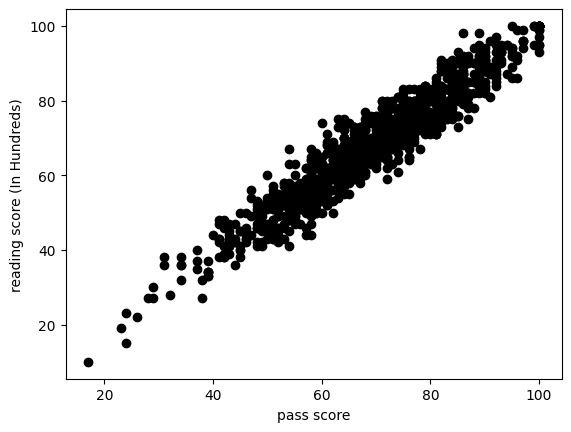

In [19]:
X = data[["writing score","reading score"]]
#Visualise data points
plt.scatter(X["reading score"],X["writing score"],c='black')
plt.xlabel('pass score')
plt.ylabel('reading score (In Hundreds)')
plt.show()

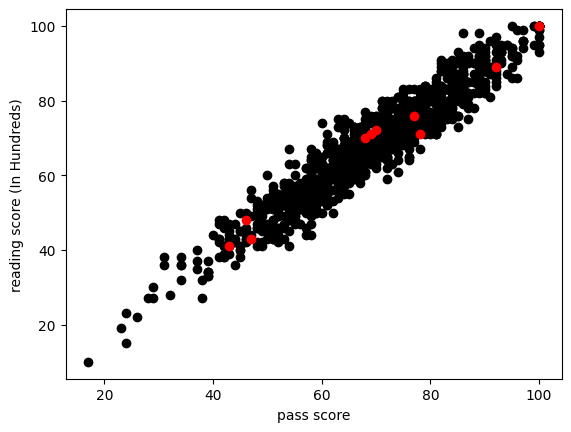

In [20]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=10

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["reading score"],X["writing score"],c='black')
plt.scatter(Centroids["writing score"],Centroids["reading score"],c='red')
plt.xlabel('pass score')
plt.ylabel('reading score (In Hundreds)')
plt.show()

In [10]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [21]:
resources = [
    "How students pass the test?",
    "Reading test and Writing test",
    "Can student eat free/reduced food and pass?",
    "Learning English",
    "High score in writing, reading and math help student to pass",
    "Taking preparation test courses",
    "Gender and race help to predict pass",
    "Students classification in academic performance and grading",
]

In [24]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [25]:
# Apply preprocessing
processed_resources = [preprocess_text(text) for text in resources]

In [26]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_resources)

In [27]:
true_k = 3  # You can change the number of clusters
model = KMeans(n_clusters=true_k, random_state=42)
model.fit(X)
labels = model.labels_

In [28]:
print("Cluster assignments:")
for i, (text, label) in enumerate(zip(resources, labels)):
    print(f"Cluster {label}: {text}")

Cluster assignments:
Cluster 2: How students pass the test?
Cluster 2: Reading test and Writing test
Cluster 0: Can student eat free/reduced food and pass?
Cluster 1: Learning English
Cluster 2: High score in writing, reading and math help student to pass
Cluster 1: Taking preparation test courses
Cluster 2: Gender and race help to predict pass
Cluster 2: Students classification in academic performance and grading


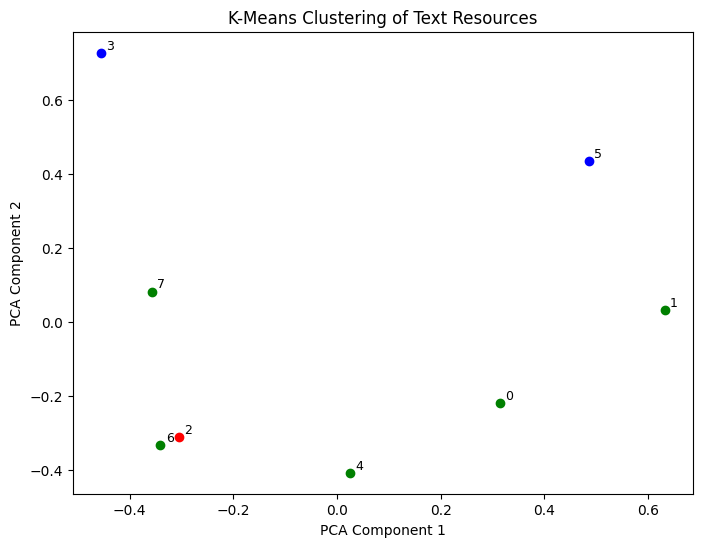

In [29]:
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X.toarray())

colors = ['r', 'b', 'g', 'y', 'c']
x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

plt.figure(figsize=(8, 6))
for i in range(len(x_axis)):
    plt.scatter(x_axis[i], y_axis[i], c=colors[labels[i]], label=f"Cluster {labels[i]}")
    plt.text(x_axis[i]+0.01, y_axis[i]+0.01, f"{i}", fontsize=9)
plt.title("K-Means Clustering of Text Resources")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()